## In-Class Assignment #2

In [25]:
### Imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from pylab import *
from matplotlib.gridspec import GridSpec
#-matplotlib specifics
import matplotlib.mlab as mlab
import math
import random
%matplotlib inline

import itertools

from matplotlib.pyplot import figure, show
from matplotlib.image  import NonUniformImage
from matplotlib.ticker import AutoMinorLocator

minorLocator   = AutoMinorLocator(12)

#--------------------------------------------------
#...Allow for using TeX mode in matplotlib Figures
#--------------------------------------------------
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
    'font.size' : 11,
        'font.family' : 'lmodern',
            'text.latex.unicode': True,
        }
plt.rcParams.update(params)
mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['xtick.major.size']=18      # major tick size in points
mpl.rcParams['xtick.minor.size']=9      # minor tick size in points
mpl.rcParams['ytick.major.size']=18      # major tick size in points
mpl.rcParams['ytick.minor.size']=9      # minor tick size in points
mpl.rcParams['xtick.major.width']=0.8      # major tick size in points
mpl.rcParams['xtick.minor.width']=0.6      # minor tick size in points
mpl.rcParams['ytick.major.width']=0.8      # major tick size in points
mpl.rcParams['ytick.minor.width']=0.6

## Problem 1

Implement the linear interpolation method as a function and test it on the arrays of x and f(x) values generated by the file interp.py for values of x that are midway between the given data points.

In [26]:
# This function performs a linear interpolation of a function
# f(x) given discrete data points, x_i and f(x_i) using 
# equation (2.1) of Pang. 
#
# The function takes in as arguments:
# x_discrete - discrete set of points
# f_of_x_discrete - discrete set of points for function 
# f(x) we use to approximate
#
# Returns: 
# [0] - approximate f(x)
# [1] - x evaluation points
def linear_interp_1d(x_discrete,f_of_x_discrete):
    # create lists to save values at each i
    interpolation_f_of_x = []
    interpolation_x = []
    for i in range(len(x_discrete)-1):
        
        # take evaluation point to be midway between x_i and x_i+1
        x = (x_discrete[i] + x_discrete[i+1])/(2.)
        
        # equation 2.1
        interpolation_1d_i = f_of_x_discrete[i] + \
        ((x-x_discrete[i])/(x_discrete[i+1]-x_discrete[i])) * \
        (f_of_x_discrete[i+1]-f_of_x_discrete[i]) 
        interpolation_f_of_x.append(interpolation_1d_i)
        interpolation_x.append(x)
    
    # convert to arrays
    interpolation_f_of_x = np.asarray(interpolation_f_of_x)
    interpolation_x = np.asarray(interpolation_x)
    return interpolation_f_of_x,interpolation_x

import interp

#first import the discrete x_i and f(x_i)
x_discrete = interp.all_x
f_of_x_discrete = interp.all_f_of_x

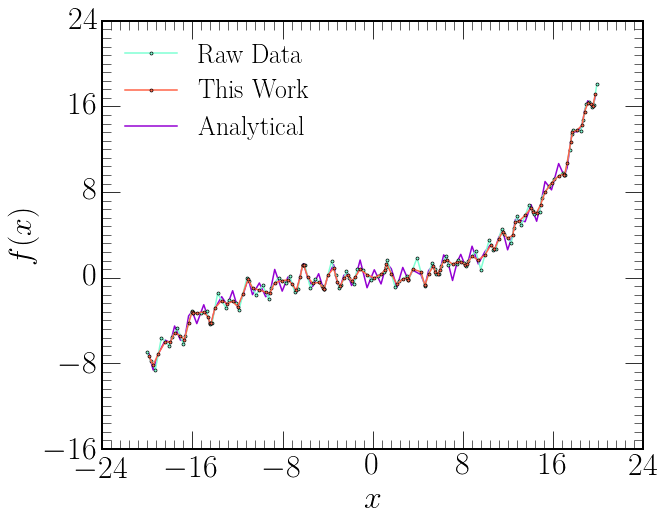

In [27]:
fig=plt.figure(figsize=(10,8),linewidth=5.0)
ax=fig.add_subplot(111)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(7))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))

interp_results = linear_interp_1d(x_discrete,f_of_x_discrete)[0]
x_midway = linear_interp_1d(x_discrete,f_of_x_discrete)[1]

lines1 = plt.plot(x_discrete,f_of_x_discrete,'aquamarine',label=r'$\rm{Raw \ Data}$')
plt.setp(lines1,linewidth = 1.5,marker='o',markeredgewidth=0.7,ms=3.0,markerfacecolor='aquamarine')

lines2 = plt.plot(x_midway,interp_results,'tomato',label=r'$\rm{This \ Work}$')
plt.setp(lines2,linewidth = 1.5,marker='o',markeredgewidth=0.7,ms=3.0,markerfacecolor='tomato')

lines3 = plt.plot(x_midway,interp.analytic_func(x_midway),'darkviolet',label=r'$\rm{Analytical}$')
plt.setp(lines3,linewidth = 1.5,marker='o',markeredgewidth=0.0,ms=0.0,markerfacecolor='darkviolet',zorder=-90)

lns = lines1+lines2+lines3
labs = [l.get_label() for l in lns]

def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])
    
handles, labels = ax.get_legend_handles_labels()
plt.legend(flip(handles, 3), flip(labs, 3), loc=2, ncol=1,fontsize=26,numpoints=1,fancybox=True, framealpha=0.0)

plt.xlabel(r'$x$',fontsize=32)
plt.ylabel(r'$f(x)$',fontsize=32)
#plt.xlim(0.5,6.5)
#plt.axhline(22.2,linewidth=2.0,color='k',ls='--')
mpl.rcParams.update({'font.size': 32})
plt.tight_layout()
#plt.savefig("./pca3_ex1_1.pdf")
plt.show()

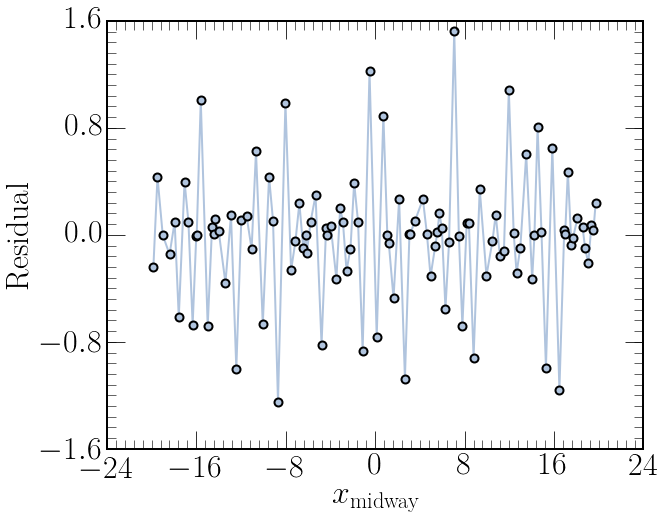

In [28]:
fig=plt.figure(figsize=(10,8),linewidth=5.0)
ax=fig.add_subplot(111)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(7))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))

interp_results = linear_interp_1d(x_discrete,f_of_x_discrete)[0]
x_midway = linear_interp_1d(x_discrete,f_of_x_discrete)[1]

lines1 = plt.plot(x_midway,interp_results-interp.analytic_func(x_midway),'lightsteelblue',label=r'$\rm{This \ Work}$')
plt.setp(lines1,linewidth = 2,marker='o',markeredgewidth=2,ms=8.0,markerfacecolor='lightsteelblue')

plt.xlabel(r'$x_{\rm{midway}}$',fontsize=32)
plt.ylabel(r'$\textup{Residual}$',fontsize=32)
#plt.xlim(0.5,6.5)
#plt.axhline(22.2,linewidth=2.0,color='k',ls='--')
mpl.rcParams.update({'font.size': 32})
plt.tight_layout()
#plt.savefig("./pca3_ex1_2.pdf")
plt.show()

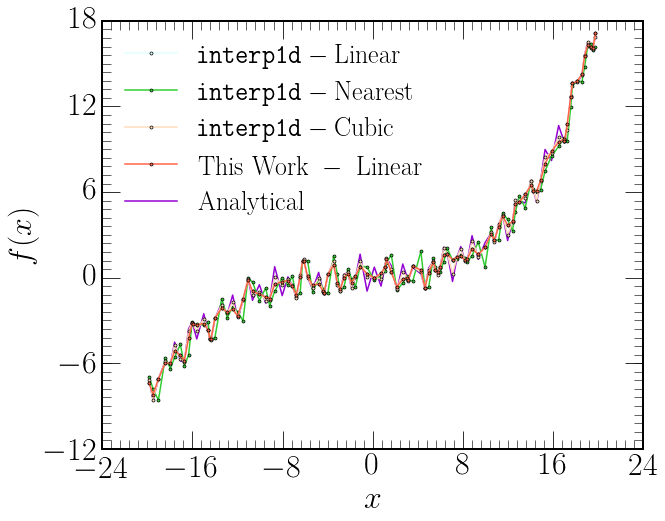

In [29]:
fig=plt.figure(figsize=(10,8),linewidth=5.0)
ax=fig.add_subplot(111)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(7))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))

interp_results = linear_interp_1d(x_discrete,f_of_x_discrete)[0]
x_midway = linear_interp_1d(x_discrete,f_of_x_discrete)[1]

from scipy import interpolate

f_linear = interpolate.interp1d(x_discrete, f_of_x_discrete,kind='linear')

lines1 = plt.plot(x_midway,f_linear(x_midway),'lightcyan',label=r'$\texttt{interp1d}-\rm{Linear}$')
plt.setp(lines1,linewidth = 1.5,marker='o',markeredgewidth=0.7,ms=3.0,markerfacecolor='lightcyan')

f_nearest = interpolate.interp1d(x_discrete, f_of_x_discrete,kind='nearest')

lines2 = plt.plot(x_midway,f_nearest(x_midway),'limegreen',label=r'$\texttt{interp1d}-\rm{Nearest}$')
plt.setp(lines2,linewidth = 1.5,marker='o',markeredgewidth=0.7,ms=3.0,markerfacecolor='limegreen')

f_cubic = interpolate.interp1d(x_discrete, f_of_x_discrete,kind='cubic')

lines3 = plt.plot(x_midway,f_cubic(x_midway),'peachpuff',label=r'$\texttt{interp1d}-\rm{Cubic}$')
plt.setp(lines3,linewidth = 1.5,marker='o',markeredgewidth=0.7,ms=3.0,markerfacecolor='peachpuff')

lines4 = plt.plot(x_midway,interp_results,'tomato',label=r'$\rm{This \ Work \ - \ Linear}$')
plt.setp(lines4,linewidth = 1.5,marker='o',markeredgewidth=0.7,ms=3.0,markerfacecolor='tomato')

lines5 = plt.plot(x_midway,interp.analytic_func(x_midway),'darkviolet',label=r'$\rm{Analytical}$')
plt.setp(lines5,linewidth = 1.5,marker='o',markeredgewidth=0.0,ms=0.0,markerfacecolor='darkviolet',zorder=-90)


lns = lines1+lines2+lines3+lines4+lines5
labs = [l.get_label() for l in lns]

def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])
    
handles, labels = ax.get_legend_handles_labels()
plt.legend(flip(handles, 5), flip(labs, 5), loc=2, ncol=1,fontsize=26,numpoints=1,fancybox=True, framealpha=0.0)

plt.xlabel(r'$x$',fontsize=32)
plt.ylabel(r'$f(x)$',fontsize=32)
#plt.xlim(0.5,6.5)
#plt.axhline(22.2,linewidth=2.0,color='k',ls='--')
mpl.rcParams.update({'font.size': 32})
plt.tight_layout()
#plt.savefig("./pca3_ex1_3.pdf")
plt.show()

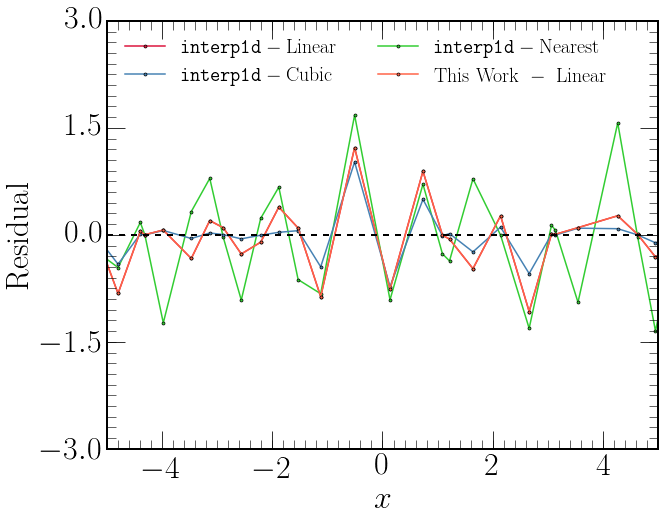

In [30]:
fig=plt.figure(figsize=(10,8),linewidth=5.0)
ax=fig.add_subplot(111)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(7))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))

interp_results = linear_interp_1d(x_discrete,f_of_x_discrete)[0]
x_midway = linear_interp_1d(x_discrete,f_of_x_discrete)[1]

from scipy import interpolate

f_linear = interpolate.interp1d(x_discrete, f_of_x_discrete,kind='linear')

lines1 = plt.plot(x_midway,f_linear(x_midway)-interp.analytic_func(x_midway),'crimson',label=r'$\texttt{interp1d}-\rm{Linear}$')
plt.setp(lines1,linewidth = 1.5,marker='o',markeredgewidth=0.7,ms=3.0,markerfacecolor='crimson')

f_nearest = interpolate.interp1d(x_discrete, f_of_x_discrete,kind='nearest')

lines2 = plt.plot(x_midway,f_nearest(x_midway)-interp.analytic_func(x_midway),'limegreen',label=r'$\texttt{interp1d}-\rm{Nearest}$')
plt.setp(lines2,linewidth = 1.5,marker='o',markeredgewidth=0.7,ms=3.0,markerfacecolor='limegreen')

f_cubic = interpolate.interp1d(x_discrete, f_of_x_discrete,kind='cubic')

lines3 = plt.plot(x_midway,f_cubic(x_midway)-interp.analytic_func(x_midway),'steelblue',label=r'$\texttt{interp1d}-\rm{Cubic}$')
plt.setp(lines3,linewidth = 1.5,marker='o',markeredgewidth=0.7,ms=3.0,markerfacecolor='steelblue')

lines4 = plt.plot(x_midway,interp_results-interp.analytic_func(x_midway),'tomato',label=r'$\rm{This \ Work \ - \ Linear}$')
plt.setp(lines4,linewidth = 1.5,marker='o',markeredgewidth=0.7,ms=3.0,markerfacecolor='tomato')

lns = lines1+lines2+lines3+lines4
labs = [l.get_label() for l in lns]

def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])
    
handles, labels = ax.get_legend_handles_labels()
plt.legend(flip(handles, 2), flip(labs, 2), loc=2, ncol=2,fontsize=20,numpoints=1,fancybox=True, framealpha=0.0)

plt.xlabel(r'$x$',fontsize=32)
plt.ylabel(r'$\rm{Residual}$',fontsize=32)
plt.ylim(-3,3)
plt.xlim(-5,5)
plt.axhline(0,linewidth=2.0,color='k',ls='--')
mpl.rcParams.update({'font.size': 32})
plt.tight_layout()
plt.savefig("./pca3_ex1_4.pdf")
plt.show()

## Problem 2

Implement the bisection method and Newton’s method for finding the roots of a mathematical function.

In [31]:
# This function performs a 1d root solve using the Bisection method.
#
# The function takes in as arguments:
# f - function for which root will be determined
# a - lower limit of bracket
# b - upper limit of bracket
# epsilon - max error in f(root)
# max_iter - maximum number of iterations before the program will exit
#
# Returns: 
# [0] - solution of f(root) to specified precision, epsilon
def root_1d_bisection(f,a,b,epsilon=1e-6,max_iter=100):
    N = 1
    while (N <= max_iter):
        if N == 1: 
            print('One-Dimensional Root Solver - Bisection Method')
            print('------------------------------------------------')
        midway = (a+b)/2.
        if np.abs(f(midway)) <= epsilon:
            print('Root found for x = ',midway,'; f(x_root) = ',f(midway),'; n_iterations = ',N,'\n\n')
            break
        else:
            N = N + 1
        if np.sign(f(midway)) == np.sign(f(a)):
            a = midway
        else:
            b = midway
        print('x:',midway,'; f(x):',f(midway),'; fprime(x): N/A')
        if N == max_iter+1:
            print('Sorry, root not find in ',max_iter,'iterations. :( Try a different interval. \n\n')
    return midway

import first_derivative as fd

# This function performs a 1d root solve using the Newton-Raphson method.
#
# The function takes in as arguments:
# f - function for which root will be determined
# x0 - initial guess for root
# epsilon - max error in f(root)
# max_iter - maximum number of iterations before the program will exit
#
# Makes use of 'first_derivative.py' using 5-point method with 
# delta x = 1e-2
#
# Returns: 
# [0] - solution of f(root) to specified precision, epsilon    
def root_1d_Newton(f,x0,epsilon,max_iter=100):
    N = 1
    while (N <= max_iter):
        if N == 1: 
            print('One-Dimensional Root Solver - Newton-Raphson Method')
            print('------------------------------------------------')
        y = f(x0)
        yprime = fd.first_derivative(f,x0,1e-2,5)
        if(abs(yprime) < epsilon):
            break
        x1 = x0 - y/yprime   
        if(np.abs(x1 - x0) <= epsilon * np.abs(x1)):
            print('Root found for x = ',x0,'; f(x_root) = ',f(x0),'; n_iterations = ',N,'\n\n')
            break
        else:
            x0 = x1
            N = N + 1
            print('x0:',x0,'; f(x0):',f(x0),'; fprime(x0):',yprime)
        if N == max_iter+1:
            print('Root not find in ',max_iter,'iterations. :( Try a different interval. \n\n')
    return x0
    
def function(x):
    return np.cos(x)-x

# just to test
root_1d_bisection(function,-1,2,epsilon=1e-7,max_iter=200)
root_1d_Newton(function,2,epsilon=1e-7,max_iter=200)

One-Dimensional Root Solver - Bisection Method
------------------------------------------------
x: 0.5 ; f(x): 0.37758256189 ; fprime(x): N/A
x: 1.25 ; f(x): -0.934677637605 ; fprime(x): N/A
x: 0.875 ; f(x): -0.234003141837 ; fprime(x): N/A
x: 0.6875 ; f(x): 0.0853349461525 ; fprime(x): N/A
x: 0.78125 ; f(x): -0.0712161164339 ; fprime(x): N/A
x: 0.734375 ; f(x): 0.0078747254585 ; fprime(x): N/A
x: 0.7578125 ; f(x): -0.0314712090259 ; fprime(x): N/A
x: 0.74609375 ; f(x): -0.0117478188273 ; fprime(x): N/A
x: 0.740234375 ; f(x): -0.0019238727809 ; fprime(x): N/A
x: 0.7373046875 ; f(x): 0.00297860328776 ; fprime(x): N/A
x: 0.73876953125 ; f(x): 0.000528158433658 ; fprime(x): N/A
x: 0.739501953125 ; f(x): -0.000697659010875 ; fprime(x): N/A
x: 0.7391357421875 ; f(x): -8.47007313748e-05 ; fprime(x): N/A
x: 0.73895263671875 ; f(x): 0.000221741242518 ; fprime(x): N/A
x: 0.739044189453125 ; f(x): 6.85233531571e-05 ; fprime(x): N/A
x: 0.7390899658203125 ; f(x): -8.08791474483e-06 ; fprime(x): N/

0.73908513321981395

## Test on functions provided in $\texttt{root.py}$.

## f1 = $(x-2.5)(x+8.7)(x+1.2)$

In [32]:
import root as test_functions

ImportError: No module named 'root'

In [ ]:
# root 1, x = +2.5
# bracket = -1,3
# x0 = 2
root_1d_bisection(test_functions.f1,-1,3,epsilon=1e-7,max_iter=200)
root_1d_Newton(test_functions.f1,2,epsilon=1e-7,max_iter=200)

# root 2, x = -8.7
# bracket  = -10,-6
# x0 = -10
root_1d_bisection(test_functions.f1,-10,-6,epsilon=1e-7,max_iter=200)
root_1d_Newton(test_functions.f1,-10,epsilon=1e-7,max_iter=200)

# root 3, x = -1.2
# bracket  = -10,-6
# x0 = -1
root_1d_bisection(test_functions.f1,-2,1,epsilon=1e-7,max_iter=200)
root_1d_Newton(test_functions.f1,-1,epsilon=1e-7,max_iter=200)

## f2 = $(0.2sin(2x)+0.6) + 0.2x$

In [ ]:
root_1d_bisection(test_functions.f2,-4,-2,epsilon=1e-7,max_iter=200)
root_1d_Newton(test_functions.f2,-3,epsilon=1e-7,max_iter=200)

## f3 = $(sin(2(x-4))+0.6) + 0.5(x-4)^{2}$

In [ ]:
# root 1, x ~ 3.2
# bracket  = 3,3.2
# x0 = 3
root_1d_bisection(test_functions.f3,3,3.2,epsilon=1e-7,max_iter=200)
root_1d_Newton(test_functions.f3,3,epsilon=1e-7,max_iter=200)

# root 2, x ~ 3.6
# bracket  = 3.3,3.7
# x0 = 3.5
root_1d_bisection(test_functions.f3,3.3,3.7,epsilon=1e-7,max_iter=200)
root_1d_Newton(test_functions.f3,3.5,epsilon=1e-7,max_iter=200)